# **Part II: Tweet Sentiment Visualization**


This Jupyter Notebook entails the second part of the tasks we carried out to complete the data processing and analysis for the social media part of our project. It includes the primary statistics and visualization of the Twitter data collected using the `snscraper` library in the Part I notebook. We mainly look at the overall sentiment of all the Tweets and whether the sentiment changes across the time (including the key judgement turning around June 2022). We also carry out a parallel sentiment analysis using the `nltk` library in Python, in order to carry out a comparison with the results produced by the pre-trained Ro-BERTa Model which we use as our primary analysis model.

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt     # importing plotting and visualization libraries
import matplotlib.spines as sp
import seaborn as sns
plt.rcParams['font.size'] = 12

### 1. Load in Tweets sentiment-analyzed data from Part I

In [ ]:
merged_df = pd.read_csv('/content/analyzed_tweet_merged.csv')

In [ ]:
merged_df.head()

,Unnamed: 0,Date,Tweet,latitude,longitude,city,sentiment
0,0,2022-01-31,"Nazis, banned books, suppressed voting rights, no abortion, dictator, insurrection. \nWhat have you let trump do to America?\n\nMy God #VoteBlueNoMatterWho \nYou have to hate America not to.",40.7128,-74.006,New York City,Negative
1,1,2022-01-31,@SenatorLankford In case you haven't noticed abortion is LEGAL in this country.,40.7128,-74.006,New York City,Neutral
2,2,2022-01-31,@SenatorLankford So you support pushing abortion underground?,40.7128,-74.006,New York City,Negative
3,3,2022-01-31,@RayRiosy @Gdad1 @ltwlauren @AngelMHart417 @JimRDecker3rd @RobertChivsano @Ol_Man_Winter @LiberalWarrior_ @Brad_Wil_Bee @purpledragula @GothicFunktion @calderaro_james @WhitemanDonna @LottieResister @MeganRN67 @Lasher0408 @Thenumbered666 @Emma_has_hope Not to mention abortion- which is also a right…..,40.7128,-74.006,New York City,Neutral
4,4,2022-01-31,@alicee_pll @miaana_14 People who support the pro abortion movement are the ones shaming God's gifts.,40.7128,-74.006,New York City,Negative


In [ ]:
# tweet counts by sentiment 
df_sentiment = pd.DataFrame(merged_df['sentiment'].value_counts())
df_sentiment

,sentiment
Negative,5835
Neutral,2272
Positive,352


<AxesSubplot:>

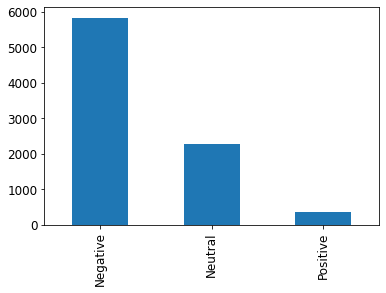

In [ ]:
# rough plot to see the pattern
# plot tweet counts by sentiment
merged_df['sentiment'].value_counts().plot(kind='bar')

### 2. Visualize Tweet counts by sentiment and by city

We want to plot the tweet count by sentiment in a pie chart to see what proportion of each sentiment generally. Then we also try to expore the statistics in different cities, which is the bar chart below showing that the pattern is similar across four cities. Then to make it more clear which sentiment takes up the greatest proportion, we draw up the pie chart for each city separately.

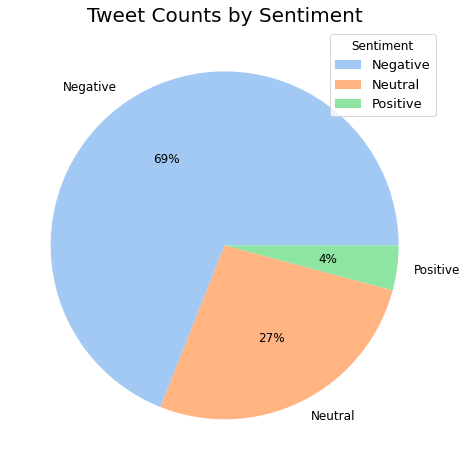

In [ ]:
# pie chart of tweet counts by sentiment
# choose colors from seaborn 
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.rcParams['font.size'] = 12
plt.pie(df_sentiment['sentiment'], labels = ['Negative', 'Neutral', 'Positive'], colors = colors, autopct='%.0f%%')
plt.title('Tweet Counts by Sentiment', fontsize=20)
plt.legend(title= 'Sentiment', fontsize = 13)
plt.rcParams['font.size'] = 18
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show()

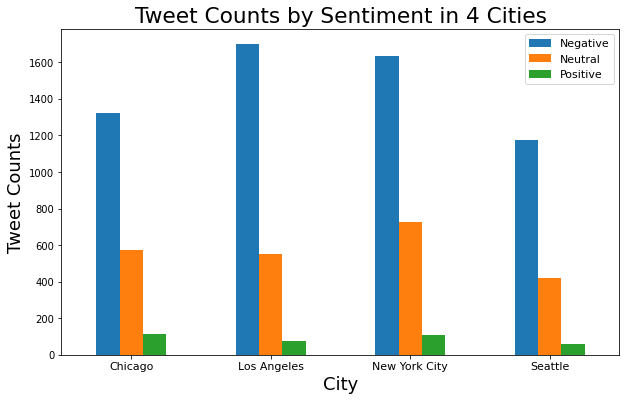

In [ ]:
# plot sentiment tweets counts by city 
counts = merged_df.groupby(["city", "sentiment"]).size().unstack(fill_value=0)
counts.plot(kind="bar", figsize=(10,6), fontsize=10)
plt.xticks(rotation=0, fontsize = 11)
plt.xlabel('City')
plt.ylabel('Tweet Counts')
plt.title('Tweet Counts by Sentiment in 4 Cities')
plt.legend(fontsize = 11)
plt.show()

### 3. Visualize sentiment across time

In order to study the sentiment changes across the time. We group the data by date and by sentiment and then resample it to be grouped by each month.
To analyze the Tweet count as well as the overall sentiment, we then sum up the tweet counts for each month and calculate the percentage of each sentiment based on the tweet count of each sentiment and the sum. We store this data in a dataframe so that we can more easily visualize the sentiment changes across the time.

Then we plot the total count changes from 2020-01 to 2023-01 as well as the changes for each sentiment group. The total tweet count roughly matches the tweet count of the negative group, which takes up most of the tweets. The count starts to rise around April 2020 then declines around December 2020. It indeed matches our hypothesis that there is heated discussion on twitter around the time the Roe v Wade case was overturned. The time-series plot displays this pattern more neatly. However, the sentiment changes is not clear enough. An additional plot of changes in percentage of tweets in each sentiment group has also been plotted to indicate the changes of overall sentiment. If we were to calculate the proportion indicating the average sentiment, no clear pattern can be found which match our hypothesis. The proportion of each sentiment does not seem to change drastically with the progression of time.

In [ ]:
# resample by month
counts = merged_df.groupby(["Date", "sentiment"]).size().unstack(fill_value=0)
counts.index = pd.to_datetime(counts.index)
counts_monthly = counts.resample("M").sum()

# sum of the tweet count
counts_monthly
counts_monthly['Total'] = counts_monthly.loc[:,['Negative','Neutral', 'Positive']].sum(axis=1)

# calculate percentage
counts_monthly['percentage_neg'] =  counts_monthly['Negative'] / counts_monthly['Total']
counts_monthly['percentage_neu'] = counts_monthly['Neutral'] / counts_monthly['Total']
counts_monthly['percentage_pos'] = counts_monthly['Positive'] / counts_monthly['Total']

In [ ]:
counts_monthly

sentiment,Negative,Neutral,Positive,Total,percentage_neg,percentage_neu,percentage_pos
Date,,,,,,,
2022-01-31,111,65,13,189,0.587302,0.343915,0.068783
2022-02-28,109,54,12,175,0.622857,0.308571,0.068571
2022-03-31,208,93,18,319,0.652038,0.291536,0.056426
2022-04-30,319,109,6,434,0.735023,0.251152,0.013825
2022-05-31,756,299,49,1104,0.684783,0.270833,0.044384
2022-06-30,724,340,40,1104,0.655797,0.307971,0.036232
2022-07-31,759,286,59,1104,0.687500,0.259058,0.053442
2022-08-31,507,226,45,778,0.651671,0.290488,0.057841
2022-09-30,594,244,34,872,0.681193,0.279817,0.038991


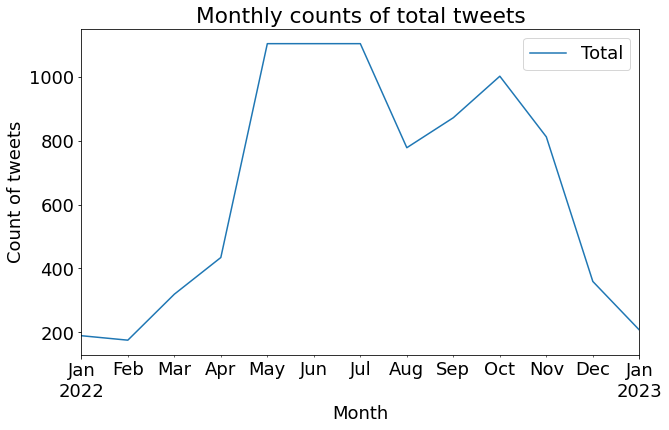

In [ ]:
ax = counts_monthly.plot(y='Total', legend=None, figsize=(10, 6))
ax.set_xlabel("Month")
ax.set_ylabel("Count of tweets")
ax.set_title("Monthly counts of total tweets")

# add a legend and show the plot
ax.legend()
plt.rcParams['font.size'] = 10
plt.show()

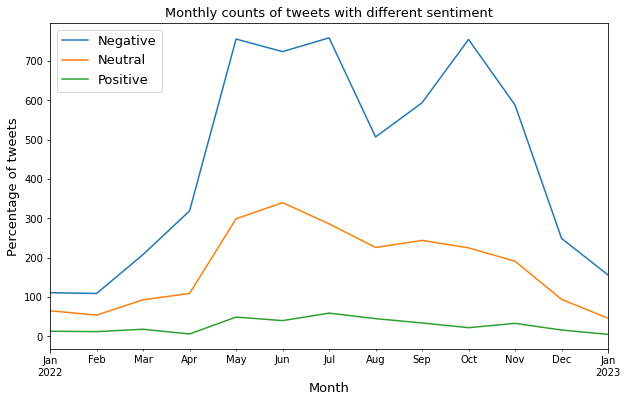

In [ ]:
ax = counts_monthly.plot(y=['Negative', 'Neutral', 'Positive'], legend=None, figsize=(10, 6))
ax.set_xlabel("Month", fontsize=13)
ax.set_ylabel("Percentage of tweets", fontsize=13)
ax.set_title("Monthly counts of tweets with different sentiment", fontsize=13)

# add a legend and show the plot
ax.legend(fontsize=13)
plt.rcParams['font.size'] = 10
plt.show()

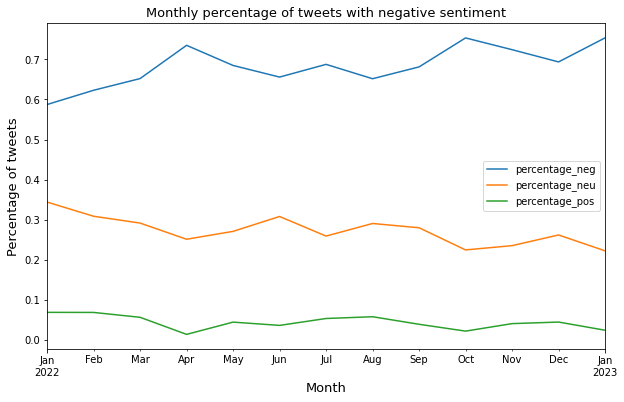

In [ ]:
ax = counts_monthly.plot(y=['percentage_neg', 'percentage_neu', 'percentage_pos'], legend=None, figsize=(10, 6))
ax.set_xlabel("Month", fontsize=13)
ax.set_ylabel("Percentage of tweets", fontsize=13)
ax.set_title("Monthly percentage of tweets with negative sentiment", fontsize=13)

# add a legend and show the plot
ax.legend()
plt.rcParams['font.size'] = 10
plt.show()

Below are time-series plots in general and in each city without monthly statistics.

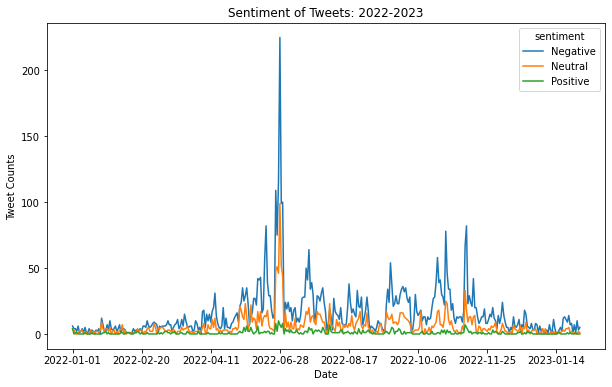

In [ ]:
# tweet counts of each sentiment from 2022-01 to 2023-01
counts = merged_df.groupby(["Date", "sentiment"]).size().unstack(fill_value=0)
counts.plot(kind="line", figsize=(10,6), fontsize=10)
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets: 2022-2023')
plt.rcParams['font.size'] = 12
plt.show()

* Comparing changes before and after Roe v Wade overturned on 2022-06-24 

The tweet count and sentiment by percentage of tweets do tell the general trend, but no clear pattern and changes in sentiment has been captured. The following charts aims to show the effects of the June 2022 ruling. I have drawn the total negative tweet counts changes as well as the benchmark line of average negative tweet count before and after June 2022. A similar logic is used for the neutral tweets group. The main conclusion is that the tweet count in both negative and neutral group seem to increase after June 2022, with negative group increasing more drastically, which might indicate a larger effects of the ruling.

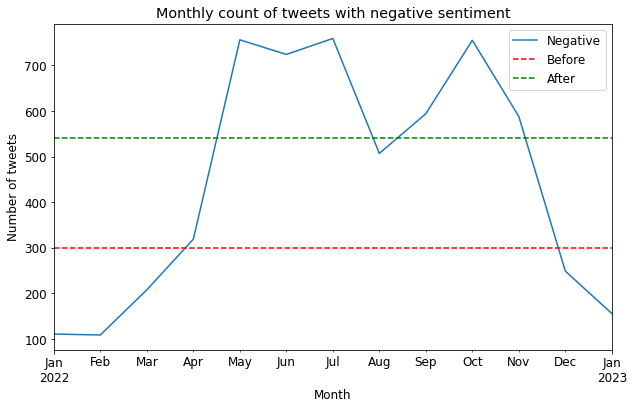

In [ ]:
# changes before 2022-06-24 to after 2022-06-24
counts = merged_df.groupby(["Date", "sentiment"]).size().unstack(fill_value=0)
counts.index = pd.to_datetime(counts.index)
counts_monthly = counts.resample("M").sum()

# compute the mean count of negative sentiment for each month
neg_before_mean = counts_monthly.loc['2022-01-01':'2022-05-31', "Negative"].mean()
neg_after_mean = counts_monthly.loc['2022-06-25':'2023-01-31', "Negative"].mean()

ax = counts_monthly.plot(y="Negative", legend=None, figsize=(10, 6))
ax.set_xlabel("Month")
ax.set_ylabel("Number of tweets")
ax.set_title("Monthly count of tweets with negative sentiment")

# add horizontal lines for the mean counts
ax.axhline(neg_before_mean, linestyle="--", color="red", label="Before")
ax.axhline(neg_after_mean, linestyle="--", color="green", label="After")

# add a legend and show the plot
ax.legend()
plt.rcParams['font.size'] = 12
plt.show()

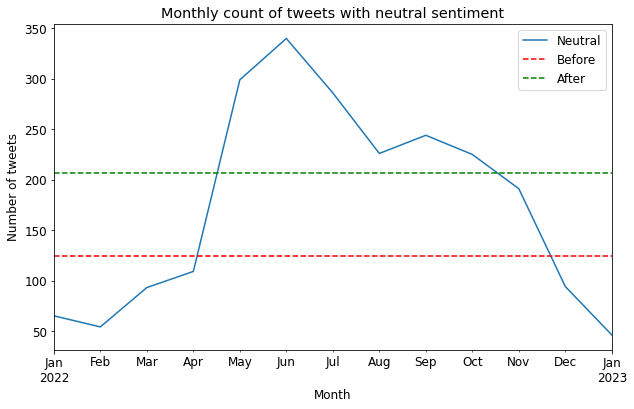

In [ ]:
# changes before 2022-06-24 to after 2022-06-24
counts = merged_df.groupby(["Date", "sentiment"]).size().unstack(fill_value=0)
counts.index = pd.to_datetime(counts.index)
counts_monthly = counts.resample("M").sum()

# compute the mean count of negative sentiment for each month
neg_before_mean = counts_monthly.loc['2022-01-01':'2022-05-31', "Neutral"].mean()
neg_after_mean = counts_monthly.loc['2022-06-25':'2023-01-31', "Neutral"].mean()

ax = counts_monthly.plot(y="Neutral", legend=None, figsize=(10, 6))
ax.set_xlabel("Month")
ax.set_ylabel("Number of tweets")
ax.set_title("Monthly count of tweets with neutral sentiment")

# add horizontal lines for the mean counts
ax.axhline(neg_before_mean, linestyle="--", color="red", label="Before")
ax.axhline(neg_after_mean, linestyle="--", color="green", label="After")

# add a legend and show the plot
ax.legend()
plt.rcParams['font.size'] = 12
plt.show()

### 4. Sentiment Analysis by using other Classifiers

This following section is the sentiment classification and analysis of the twitter data using the `nltk sentimentanalyzer`. 
Since we used the pretrained Ro-BERTa model to label our data beforehand, this part will simply follow the same logic to label the data and try to compare how these methods differ in results.

We managed to label all the data using `nltk sentimentanalyzer` on the tweet text without lemmatization (due to larger inconsistency in results for lemmatized tweets). This part does not include the word frequency but only compares the two methods in labeling the data.

The `nltk` performs extremely different from the BERT model in this task. The pie chart shows that with this classifer, only 47% of the tweets are negative, but the positive tweets takes up a larger proportion. In order to analyze how it perfroms differently from Bert, we extracted all the Tweets which the `nltk` analyzer labels differently from the BERT model. Over 4000 tweets were found to be differently labelled using BERT as compared to `nltk`. 

Some of the examples are listed below. We found out that most of such text involve replying to others' Tweets, more complicated sentence structures such as a twist or special tones like sarcasm. **BERT does seem to yield superior performance in detecting such subtle contextual information and thus we found it to be more capbable of labeling sentiment accurately**.

In [ ]:
# import nltk and related libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

In [ ]:
merged_df['Tweet']

0                                                                                                                                     Nazis, banned books, suppressed voting rights, no abortion, dictator, insurrection. \nWhat have you let trump do to America?\n\nMy God #VoteBlueNoMatterWho \nYou have to hate America not to.
1                                                                                                                                                                                                                                                    @SenatorLankford In case you haven't noticed abortion is LEGAL in this country.
2                                                                                                                                                                                                                                                                      @SenatorLankford So you support pushing abortion underground?
3                     @Ra

In [ ]:
# preprocess the text
def preprocess(sentence):
    '''
    takes in the raw text and get rid of the marks and links
    '''
    words = []
    for word in sentence.split():
        if word.startswith('@') and len(word) > 1:
            word = ''
        elif word.startswith('http'):
            word = ''
        words.append(word.lower())
    tweets_processed = " ".join(words)
    return tweets_processed

In [ ]:
# apply pre-processing to the tweets
merged_df['processed_tweets'] = merged_df['Tweet'].apply(preprocess)

In [ ]:
# use sentimentanalyzer to detect sentiment for texts
def label_sentiment(text):
    '''
    get sentiment lable for an input text
    '''
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)['compound']
    if sentiment > 0:
        label = 'Positive'
    elif sentiment < -0:
        label = 'Negative'
    else:
        label = 'Neutral'
    return label

In [ ]:
# label the data with the sentiment detactor
merged_df['sentiment_nltk'] = merged_df['processed_tweets'].apply(label_sentiment)

In [ ]:
merged_df.head()

,Unnamed: 0,Date,Tweet,latitude,longitude,city,sentiment,processed_tweets,sentiment_nltk
0,0,2022-01-31,"Nazis, banned books, suppressed voting rights, no abortion, dictator, insurrection. \nWhat have you let trump do to America?\n\nMy God #VoteBlueNoMatterWho \nYou have to hate America not to.",40.7128,-74.006,New York City,Negative,"nazis, banned books, suppressed voting rights, no abortion, dictator, insurrection. what have you let trump do to america? my god #votebluenomatterwho you have to hate america not to.",Negative
1,1,2022-01-31,@SenatorLankford In case you haven't noticed abortion is LEGAL in this country.,40.7128,-74.006,New York City,Neutral,in case you haven't noticed abortion is legal in this country.,Positive
2,2,2022-01-31,@SenatorLankford So you support pushing abortion underground?,40.7128,-74.006,New York City,Negative,so you support pushing abortion underground?,Positive
3,3,2022-01-31,@RayRiosy @Gdad1 @ltwlauren @AngelMHart417 @JimRDecker3rd @RobertChivsano @Ol_Man_Winter @LiberalWarrior_ @Brad_Wil_Bee @purpledragula @GothicFunktion @calderaro_james @WhitemanDonna @LottieResister @MeganRN67 @Lasher0408 @Thenumbered666 @Emma_has_hope Not to mention abortion- which is also a right…..,40.7128,-74.006,New York City,Neutral,not to mention abortion- which is also a right…..,Neutral
4,4,2022-01-31,@alicee_pll @miaana_14 People who support the pro abortion movement are the ones shaming God's gifts.,40.7128,-74.006,New York City,Negative,people who support the pro abortion movement are the ones shaming god's gifts.,Positive


In [ ]:
df_sentiment_nltk = pd.DataFrame(merged_df['sentiment_nltk'].value_counts())
df_sentiment_nltk

,sentiment_nltk
Negative,3976
Positive,3282
Neutral,1201


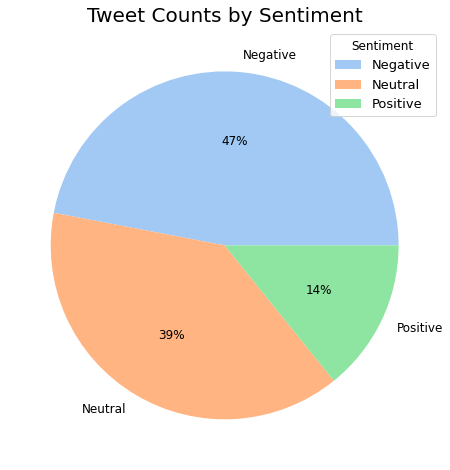

In [ ]:
# pie chart of tweet counts by sentiment
# choose colors from seaborn 
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(df_sentiment_nltk['sentiment_nltk'], labels = ['Negative', 'Neutral', 'Positive'], colors = colors, autopct='%.0f%%')
plt.title('Tweet Counts by Sentiment', fontsize=20)
plt.legend(title= 'Sentiment', fontsize = 13)

fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.rcParams['font.size'] = 12
plt.show()

In [ ]:
# show full texts
pd.set_option('display.max_colwidth', None)

# get the tweets where the sentiment is inconsistent 
merged_df[merged_df['sentiment'] != merged_df['sentiment_nltk']][['Tweet', 'sentiment','sentiment_nltk']]

,Tweet,sentiment,sentiment_nltk
1,@SenatorLankford In case you haven't noticed abortion is LEGAL in this country.,Neutral,Positive
2,@SenatorLankford So you support pushing abortion underground?,Negative,Positive
4,@alicee_pll @miaana_14 People who support the pro abortion movement are the ones shaming God's gifts.,Negative,Positive
6,@margrie12 @talkRADIO @JamesMelville @cristo_radio Now do abortion and sex transition treatment and,Negative,Neutral
7,"""But by focusing on an individual narrative, the movie doesn’t go far enough in critiquing the systems that perpetuate inequities in abortion access, such as race and class barriers.""\n\nhttps://t.co/TfeV5bxBae",Negative,Neutral
...,...,...,...
8450,"@xkeyxkey Also, sad to say, being conservative has come to mean demonizing and outlawing private behaviors (e.g., gay love, abortion) that have nothing to do with you—while railing against “the nanny state.” So: hypocrisy.",Negative,Positive
8452,The @US_FDA’s Abortion Announcement Is Not What You Think https://t.co/a3LVdgPSUF @thenation @RBraceySherman @AbortionStories @DrDGrossman @ANSIRH @IbisRH @TracyWeitz,Negative,Neutral
8454,A far-right judge appointed by Donald Trump may soon ban the abortion pill in all 50 states. https://t.co/MTiPUpTe0J via @slate,Neutral,Negative
8457,"@RpsAgainstTrump Cheney may be a profile in courage, but her stances on issues like abortion and taxes put her too far right to win a general.",Negative,Positive


In [ ]:
# monthly statistics
counts = merged_df.groupby(["Date", "sentiment_nltk"]).size().unstack(fill_value=0)
counts.index = pd.to_datetime(counts.index)
counts_monthly = counts.resample("M").sum()

# sum of the tweet counts
counts_monthly
counts_monthly['Total'] = counts_monthly.loc[:,['Negative','Neutral', 'Positive']].sum(axis=1)

# calculate the percentage
counts_monthly['percentage_neg'] =  counts_monthly['Negative'] / counts_monthly['Total']
counts_monthly['percentage_neu'] = counts_monthly['Neutral'] / counts_monthly['Total']
counts_monthly['percentage_pos'] = counts_monthly['Positive'] / counts_monthly['Total']

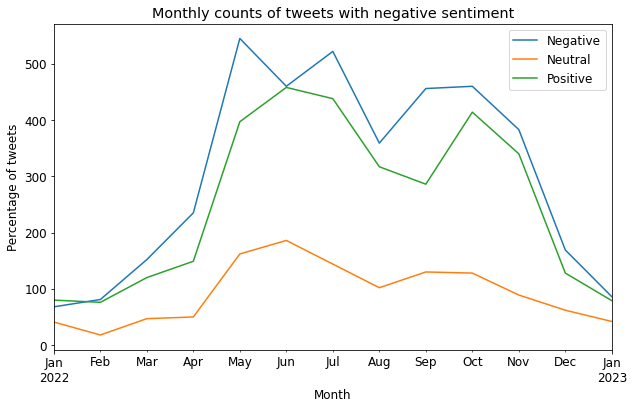

In [ ]:
ax = counts_monthly.plot(y=['Negative', 'Neutral', 'Positive'], legend=None, figsize=(10, 6))
ax.set_xlabel("Month")
ax.set_ylabel("Percentage of tweets")
ax.set_title("Monthly counts of tweets with negative sentiment")

# add a legend and show the plot
ax.legend()
plt.rcParams['font.size'] = 12
plt.show()

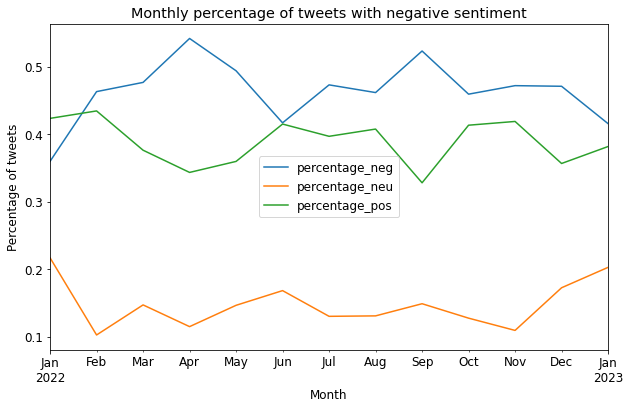

In [ ]:
ax = counts_monthly.plot(y=['percentage_neg', 'percentage_neu', 'percentage_pos'], legend=None, figsize=(10, 6))
ax.set_xlabel("Month")
ax.set_ylabel("Percentage of tweets")
ax.set_title("Monthly percentage of tweets with negative sentiment")

# add a legend and show the plot
ax.legend()
plt.rcParams['font.size'] = 12
plt.show()